# 신경망 구조 <br>
hidden layer 수 =1 <br>
hidden layer의 node 수 = 512


In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

60000:이미지 갯수, <br>
28x28:이미지 Size (28x28개의 pixels로 구성)

In [4]:
train_images[0] # 첫번째 이미지, 255 =  white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
import matplotlib.pyplot as plt

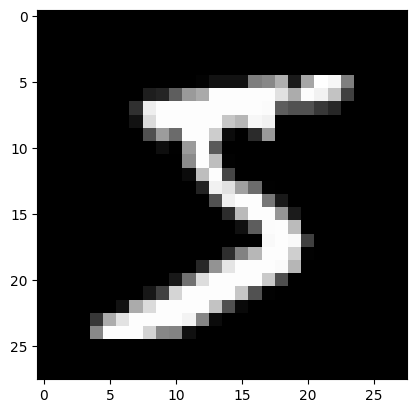

In [6]:
plt.imshow(train_images[0], cmap='gray') # cmap='gray', vmin=0, vmax=255  낮은 값(0)을 어두운 색(검정색)으로, 높은 값(255)을 밝은 색(흰색)으로 매핑
plt.show()

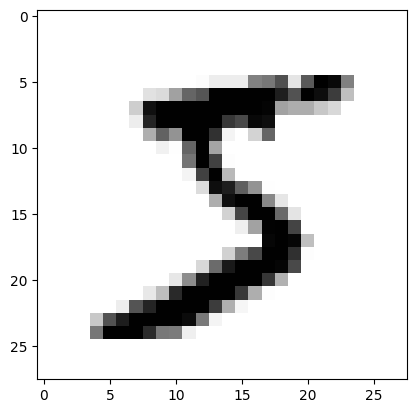

In [7]:
plt.imshow(train_images[0], cmap='gray_r') # cmap='gray_r', vmin=0, vmax=255  # r "reverse", 색상 맵의 색상 순서 반전
plt.show()

In [8]:
train_labels[1]

0

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [10]:
model = models.Sequential()

Sequential 클래스 생성자를 통해 객체(객체명 model) 생성 <br>
이 기본 network안에 layer 추가

In [11]:
model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
# model.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))

Hiddenlayer 생성 <br>
512개의 노드 <br>
relu 활성화 함수 <br>
28x28개의 input <br>
(input_shape <- 입력 node의 수)

In [12]:
model.add(layers.Dense(10, activation = 'softmax'))

Output layer <br>
노드수: 10개( = class 수) <br>
활성화함수: softmax

In [13]:
model.summary()
# (512*28*28) + 512
# 513 * 10
################# FNN 네트워크를 그려보세요


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


input data의 형태를 3D array에서 2D array (즉, matrix) 형태로 변경

In [14]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28)) #### flatten

In [15]:
train_images.shape

(60000, 784)

Input scaling

In [16]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [17]:
train_labels[0]

5

종속변수값 0~9

In [18]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [19]:
train_labels_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
test_labels.shape

(10000,)

test 데이터에 있는 첫번째 이미지의 종속변수 값은 7 <br>
이것이 one-hot vector로 변경 됨

In [21]:
test_labels[0]

7

In [22]:
test_labels_one_hot.shape

(10000, 10)

In [23]:
test_labels_one_hot[0] # one-hot vector (7번째 값만이 1)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

옵티마이져: rmsprop <br>
비용함수: categorical_crossentropy

In [24]:
from tensorflow.keras import optimizers
rmsprop = optimizers.RMSprop(learning_rate=0.001) # 기본적으로 lr값.. 0.001

In [25]:
model.compile(optimizer=rmsprop,
               loss='categorical_crossentropy',   # cf binary_crossentropy
               metrics=['accuracy'])
# metrics => 모형의 성능을 무엇으로 평가할 것인지에 대한 것
# 'accuracy' => 전체의 관측치 중에서 몇 개 관측치의 종속변수 값을 제대로 맞혔는지를 의미

In [26]:
history = model.fit(train_images, train_labels_one_hot, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 3ms/step - loss: 0.2567 - accuracy: 0.9262
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1041 - accuracy: 0.9690
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0693 - accuracy: 0.9792
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0501 - accuracy: 0.9848
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0379 - accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0297 - accuracy: 0.9910
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0227 - accuracy: 0.9932
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0170 - accuracy: 0.9948
Epoch 9/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0138 - accuracy: 0.9960
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0106 - accuracy: 0.9969

fit() 함수를 통해서 학습 <br>
epochs: 전체의 학습 데이터의 사용 횟수 지정 <br>
batch_size: 한번의 학습에 사용되는 data record 갯수 (weight를 업데이트)

In [27]:
model.save('_03_CNN_02_Mnist_FNN.h5')

In [28]:
test_images.shape

(10000, 784)

In [29]:
model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9804


[0.07026323676109314, 0.980400025844574]

## 예측하기

In [30]:
model.predict(test_images[0:1])

1/1 [==============================] - 0s 98ms/step


array([[4.1680819e-11, 1.6723722e-13, 1.2377964e-08, 8.3743449e-05,
        1.4409835e-15, 8.9239095e-11, 1.2236768e-19, 9.9991596e-01,
        1.9263261e-08, 2.7219528e-07]], dtype=float32)

In [31]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
model.predict(test_images[0:1])

1/1 [==============================] - 0s 18ms/step


array([[0.          , 0.          , 0.0000000124, 0.0000837434,
        0.          , 0.0000000001, 0.          , 0.99991596  ,
        0.0000000193, 0.0000002722]], dtype=float32)

In [32]:
test_labels[0]

7

In [33]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
labels[np.argmax(model.predict(test_images[0:1]))]

1/1 [==============================] - 0s 22ms/step


7

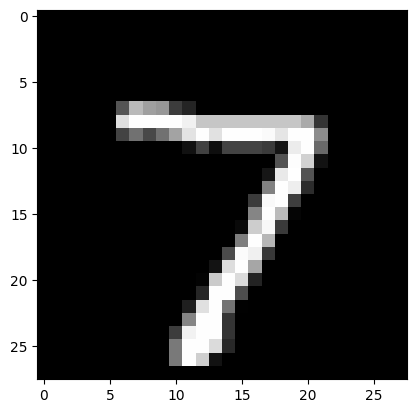

In [34]:
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.show()

## Confusion matrix 확인하기

In [35]:
y_preds_prob = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [36]:
y_preds_prob.shape

(10000, 10)

In [37]:
y_preds = np.argmax(y_preds_prob, axis=1)

In [38]:
y_preds.shape

(10000,)

In [39]:
y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
confusion_matrix(test_labels, y_preds)

array([[ 969,    0,    1,    1,    1,    0,    1,    1,    4,    2],
       [   0, 1125,    3,    2,    0,    0,    2,    0,    3,    0],
       [   2,    0, 1008,    7,    2,    0,    2,    2,    8,    1],
       [   0,    0,    0, 1003,    0,    0,    0,    2,    3,    2],
       [   1,    0,    1,    1,  958,    0,    2,    4,    0,   15],
       [   2,    0,    0,   23,    1,  858,    1,    0,    6,    1],
       [   5,    2,    2,    1,    6,    4,  935,    0,    3,    0],
       [   2,    1,    8,    6,    0,    0,    0, 1003,    3,    5],
       [   0,    0,    2,    4,    0,    1,    1,    2,  960,    4],
       [   0,    2,    0,   12,    6,    0,    0,    3,    1,  985]],
      dtype=int64)

In [42]:
print(classification_report(test_labels, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# 비용함수값 확인하기

In [43]:
import matplotlib.pyplot as plt

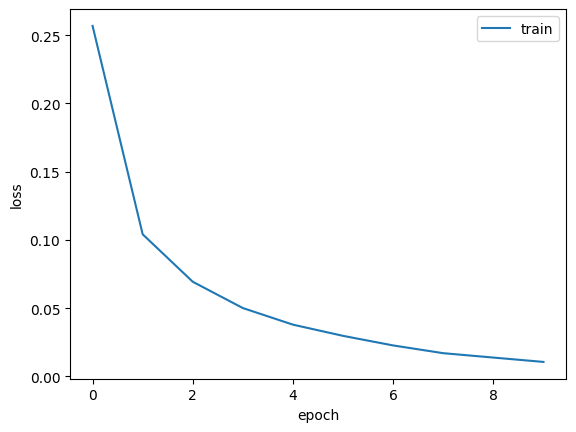

In [44]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

# Accuracy 확인하기

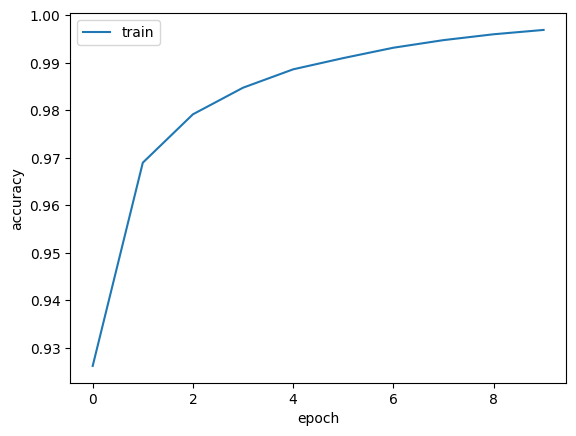

In [45]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'])
plt.show()

##  model 확장

In [46]:
model_ext = models.Sequential()
model_ext.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
model_ext.add(layers.Dense(128, activation = 'relu'))
model_ext.add(layers.Dense(10, activation = 'softmax'))

In [47]:
model_ext.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [51]:
rmsprop = optimizers.RMSprop(learning_rate=0.001)
model_ext.compile(optimizer=rmsprop,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [49]:
model_ext.fit(train_images, train_labels_one_hot, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2397 - accuracy: 0.9283
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0877 - accuracy: 0.9735
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0579 - accuracy: 0.9817
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0407 - accuracy: 0.9869
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0297 - accuracy: 0.9909
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0235 - accuracy: 0.9929
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0176 - accuracy: 0.9943
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0146 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0126 - accuracy: 0.9960
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0091 - accuracy: 0.9971

In [50]:
model_ext.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0933 - accuracy: 0.9827


[0.09327395260334015, 0.982699990272522]

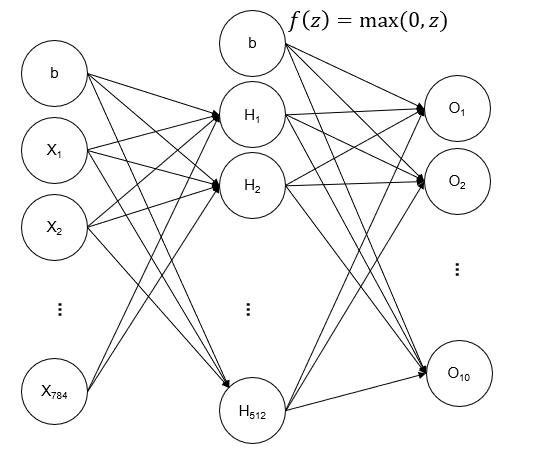